### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import ssl

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('data/AirPassengers.csv')

In [4]:
# co2 = sm.datasets.get_rdataset('co2')
# co2 = co2.data
# co2['time'] = pd.to_datetime(co2['time'])
# #co2 = co2.set_index(pd.date_range('1-1-1959', periods = len(co2), freq = 'M')).drop('time', axis = 1)

### Check datasets, convert and set timestamp columns as index

In [5]:
# ss = sunspots.data
# ss['YEAR'] = pd.to_datetime(ss['YEAR'])
# ss = ss.set_index('YEAR')
ss = sunspots.data.set_index('YEAR')

In [6]:
# check if it can be multiplicative model
ss[ss['SUNACTIVITY'] <= 0]

,SUNACTIVITY
YEAR,
1711.0,0.0
1712.0,0.0
1810.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

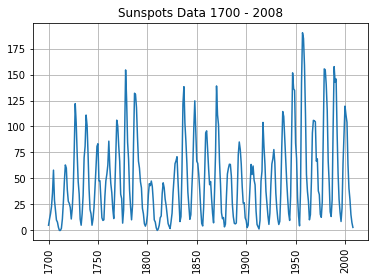

In [7]:
plt.plot(ss)
plt.title('Sunspots Data 1700 - 2008')
plt.grid()
plt.xticks(rotation = 90)
#plt.legend()
plt.show

In [8]:
ss

,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0
...,...
2004.0,40.4
2005.0,29.8
2006.0,15.2


In [9]:
air['Month'] = pd.to_datetime(air['Month'])
air = air.set_index('Month')

In [10]:
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<function matplotlib.pyplot.show(close=None, block=None)>

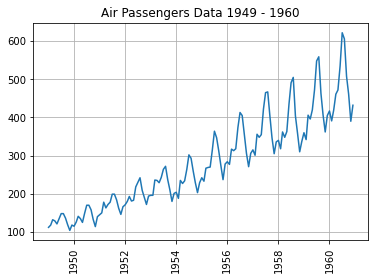

In [11]:
plt.plot(air)
plt.title('Air Passengers Data 1949 - 1960')
plt.grid()
plt.xticks(rotation = 90)
#plt.legend()
plt.show

### Decompose

#### Sunspots Data 1700 - 2008

In [12]:
ss_results = seasonal_decompose(ss, model = 'additive', period = 11)

<function matplotlib.pyplot.show(close=None, block=None)>

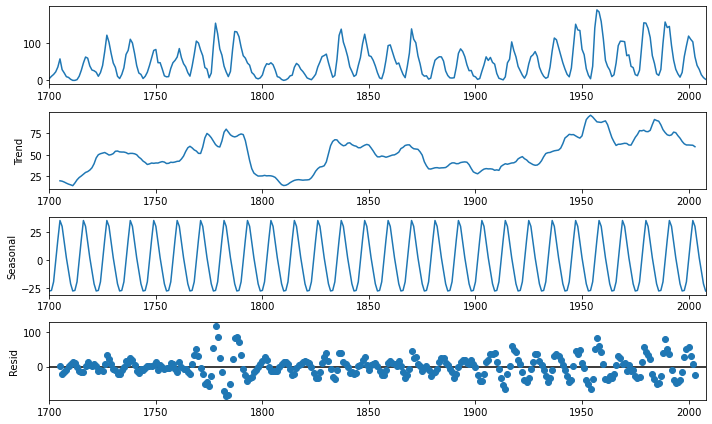

In [13]:
plt.rcParams["figure.figsize"] = (10,6)
ss_results.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

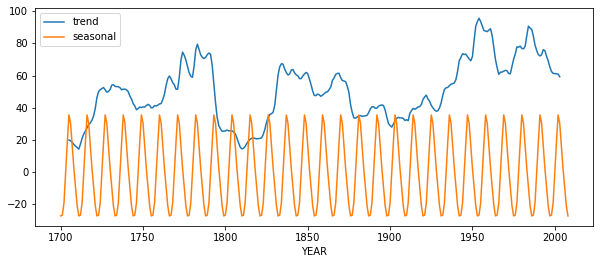

In [14]:
plt.subplots(figsize=(10,4))
ss_results.trend.plot()
ss_results.seasonal.plot()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

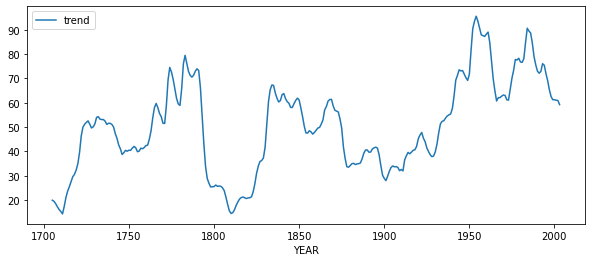

In [15]:
plt.subplots(figsize=(10,4))
ss_results.trend.plot()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

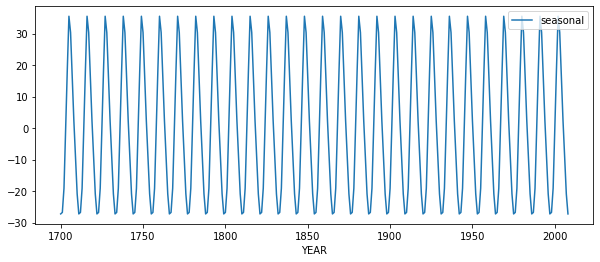

In [16]:
plt.subplots(figsize=(10,4))
ss_results.seasonal.plot()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

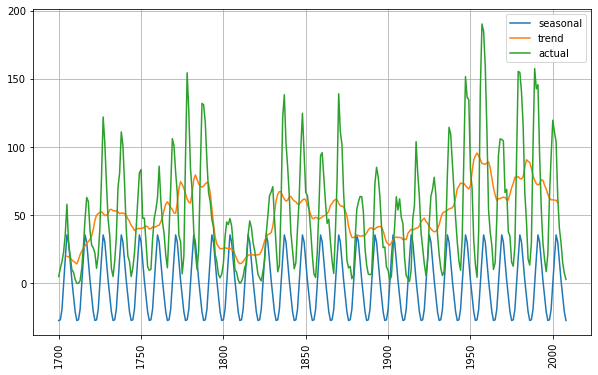

In [17]:
#season_and_trend = ss_results.seasonal + ss_results.trend
plt.subplots(figsize=(10,6))
plt.plot(ss_results.seasonal, label = 'seasonal')
plt.plot(ss_results.trend, label = 'trend')
plt.plot(ss, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

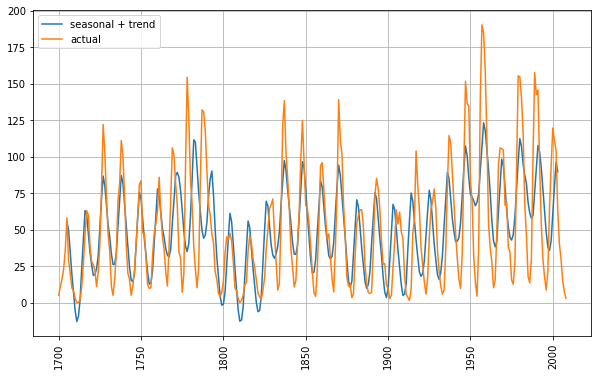

In [18]:
# check if aditive model match seasonal pattern when reconstructed
plt.subplots(figsize=(10,6))
plt.plot(ss_results.seasonal+ss_results.trend, label = 'seasonal + trend')
plt.plot(ss, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

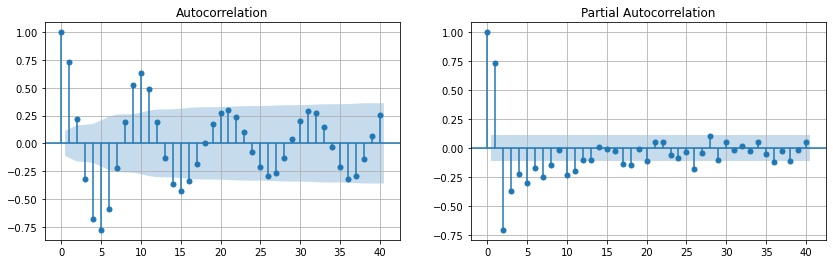

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(ss_results.resid.dropna(), ax = ax[0], lags=40)
ax[0].grid()
plot_pacf(ss_results.resid.dropna(), ax = ax[1], lags=40)
ax[1].grid()

#### Air Passengers Data 1949 - 1960

In [20]:
# check if it can be multiplicative model
air[air['#Passengers'] <= 0]

,#Passengers
Month,


In [21]:
air_results = seasonal_decompose(air, model = 'additive', period = 12)

<function matplotlib.pyplot.show(close=None, block=None)>

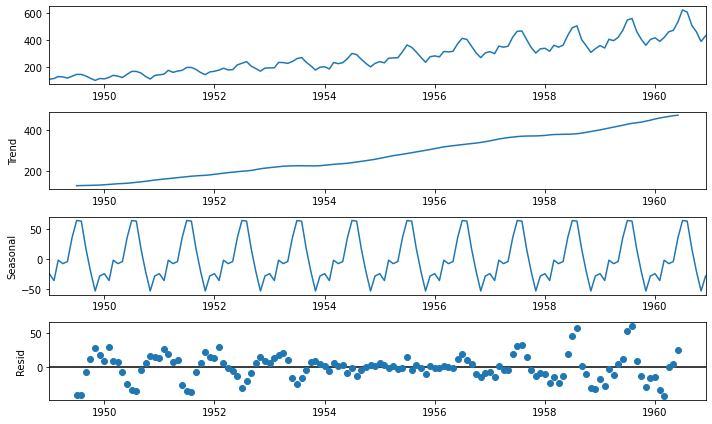

In [22]:
air_results.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

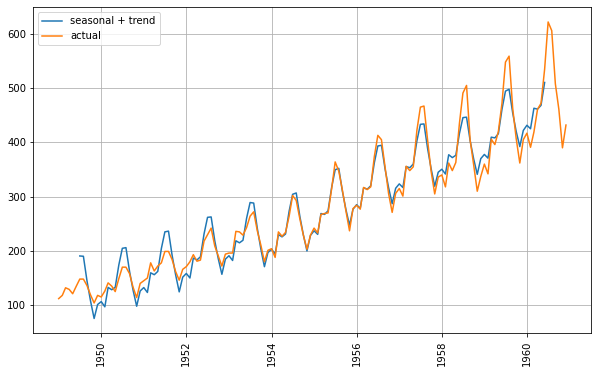

In [23]:
# check if aditive model match seasonal pattern when reconstructed
plt.plot(air_results.seasonal + air_results.trend, label = 'seasonal + trend')
plt.plot(air, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

In [24]:
air_results = seasonal_decompose(air, model = 'multiplicative')

<function matplotlib.pyplot.show(close=None, block=None)>

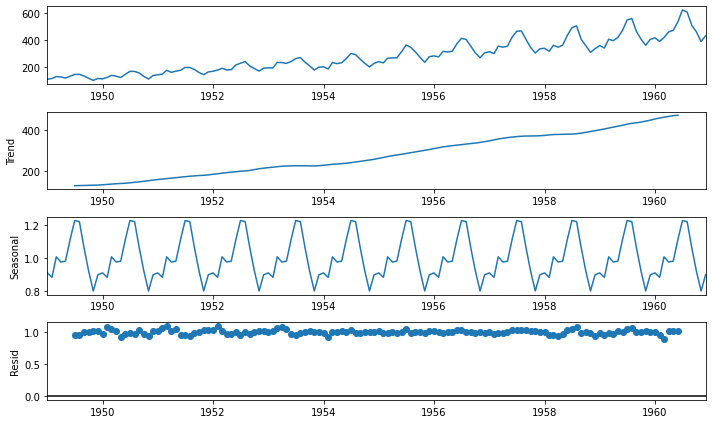

In [25]:
air_results.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

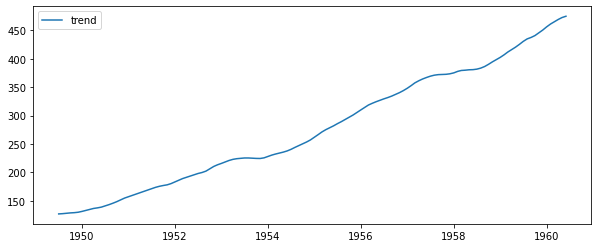

In [26]:
plt.subplots(figsize=(10,4))
plt.plot(air_results.trend, label = 'trend')
#plt.plot(air, label = 'actual')
#air.plot()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

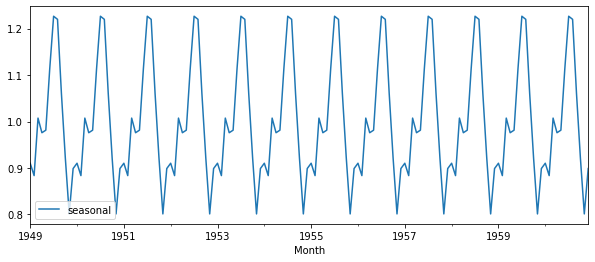

In [27]:
plt.subplots(figsize=(10,4))
air_results.seasonal.plot()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

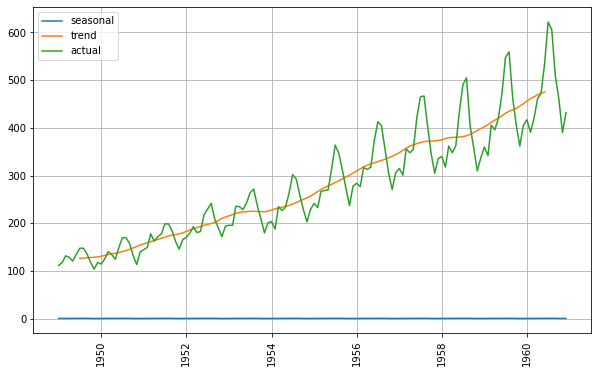

In [28]:
#season_and_trend = air_results.seasonal + air_results.trend
plt.plot(air_results.seasonal, label = 'seasonal')
plt.plot(air_results.trend, label = 'trend')
plt.plot(air, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

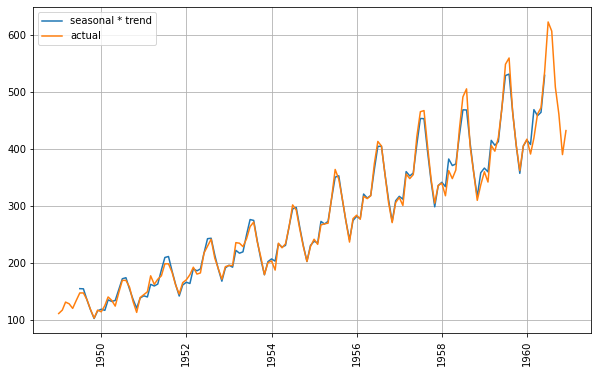

In [29]:
plt.plot(air_results.seasonal * air_results.trend, label = 'seasonal * trend')
plt.plot(air, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

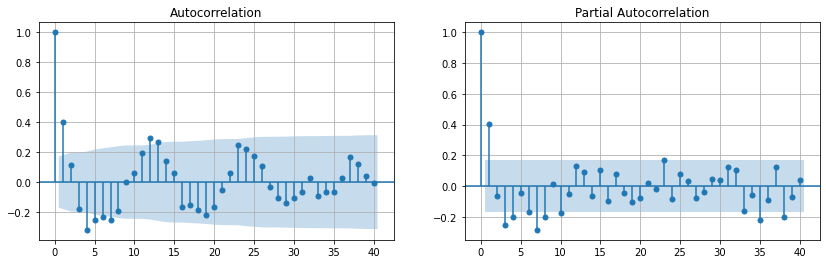

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(air_results.resid.dropna(), ax = ax[0], lags=40)
ax[0].grid()
plot_pacf(air_results.resid.dropna(), ax = ax[1], lags=40)
ax[1].grid()

In [31]:
air_results.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [32]:
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
